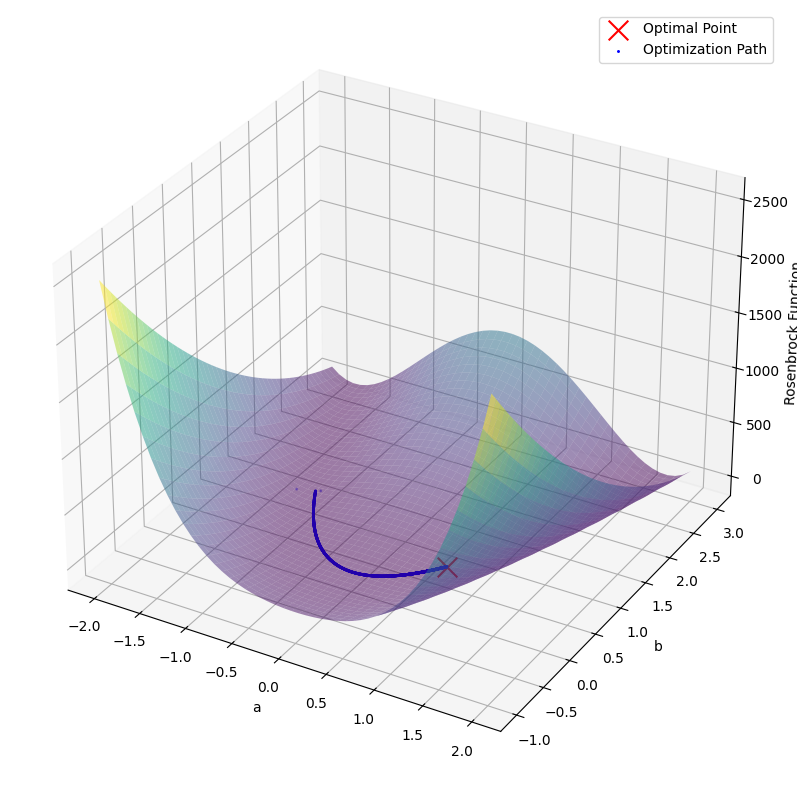

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Define the Rosenbrock function
def rosenbrock_func(a, b):
    return (1 - a)**2 + 100 * (b - a**2)**2

# Compute the numerical gradient of the Rosenbrock function using central difference method
def numerical_gradient(a, b, h=1e-5):
    # FIXME: grad_a = 
    grad_a = (rosenbrock_func(a + h, b) - rosenbrock_func(a - h, b)) / (2 * h)
    # FIXME: grad_b =
    grad_b = (rosenbrock_func(a, b + h) - rosenbrock_func(a, b - h)) / (2 * h)
    return np.array([grad_a, grad_b])

# Initialize the values of a and b (you can experiment with different initial values)
a_init, b_init = -1.2, 1.0

# Perform gradient descent
learning_rate = 0.001
num_iterations = 2000
a_val, b_val = a_init, b_init

# Store the values of a and b at each iteration for plotting
a_history, b_history = [a_val], [b_val]

for _ in range(num_iterations):
    grad_a, grad_b = numerical_gradient(a_val, b_val)
    # FIXME: a_val -= 
    a_val -= learning_rate * grad_a
    # FIXME: b_val -= 
    b_val -= learning_rate * grad_b

    a_history.append(a_val)
    b_history.append(b_val)

a_opt, b_opt = a_val, b_val

# Plot the 3D Rosenbrock function and the optimization path
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

a_range = np.linspace(-2, 2, 50)
b_range = np.linspace(-1, 3, 50)
A, B = np.meshgrid(a_range, b_range)
C = rosenbrock_func(A, B)

ax.plot_surface(A, B, C, cmap='viridis', alpha=0.5)
ax.scatter(a_opt, b_opt, 0, c='red', marker='x', s=200, label='Optimal Point')
ax.scatter(a_history, b_history, np.zeros_like(a_history), c='blue', marker='.', s=5, label='Optimization Path')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Rosenbrock Function')
ax.legend()

plt.show()

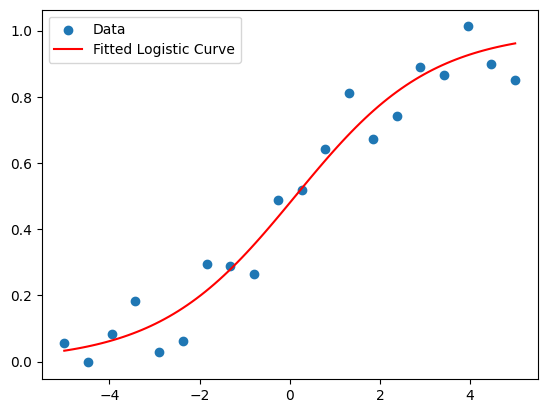

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a simple random dataset
np.random.seed(42)
x_data = np.linspace(-5, 5, num=20)
y_data = 1 / (1 + np.exp(-x_data)) + np.random.normal(scale=0.1, size=len(x_data))

# Define the logistic function
def logistic_func(a, b, x):
    # FIXME
    return 1 / (1 + np.exp(-(a * x + b)))

# Define the objective function
def objective_func(a, b):
    # FIXME 
    return np.sum((logistic_func(a, b, x_data) - y_data)**2)

# Initialize parameters (you can experiment with different initial values)
a_init, b_init = 1, 0

# Define the step size for finite differences
h = 1e-5

# Compute the gradient using central difference method
def numerical_gradient(a, b):
    # FIXME
    grad_a = (objective_func(a + h, b) - objective_func(a - h, b)) / (2 * h)
    grad_b = (objective_func(a, b + h) - objective_func(a, b - h)) / (2 * h)
    return grad_a, grad_b

# Perform gradient descent
learning_rate = 0.01
num_iterations = 1000
a_val, b_val = a_init, b_init

for _ in range(num_iterations):
    grad_a, grad_b = numerical_gradient(a_val, b_val)
    a_val -= learning_rate * grad_a
    b_val -= learning_rate * grad_b

a_opt, b_opt = a_val, b_val

# Plot the data and the fitted logistic curve
plt.scatter(x_data, y_data, label='Data')
x_fit = np.linspace(-5, 5, num=100)
y_fit = logistic_func(a_opt, b_opt, x_fit)
plt.plot(x_fit, y_fit, label='Fitted Logistic Curve', color='red')
plt.legend()
plt.show()

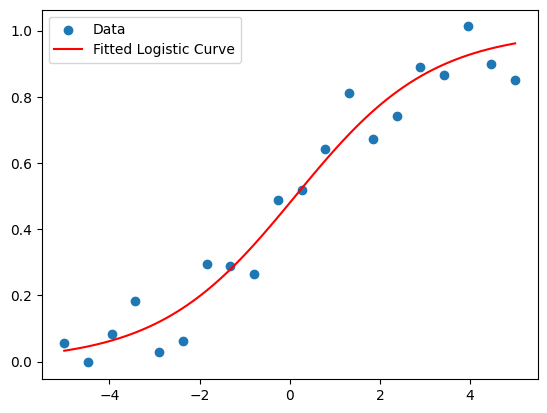

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a simple random dataset
np.random.seed(42)
x_data = np.linspace(-5, 5, num=20)
y_data = 1 / (1 + np.exp(-x_data)) + np.random.normal(scale=0.1, size=len(x_data))

# Define the logistic function
x = sp.symbols('x')
a, b = sp.symbols('a, b')
# FIXME: logistic_func = ...
logistic_func = 1 / (1 + sp.exp(-(a * x + b)))

# Fit the logistic curve to the data using Sympy's nonlinsolve
# FIXME: objective_func = ...
objective_func = sum((logistic_func.subs(x, xi) - yi)**2 for xi, yi in zip(x_data, y_data))
gradient = sp.Matrix([sp.diff(objective_func, a), sp.diff(objective_func, b)])

# Initialize parameters (you can experiment with different initial values)
a_init, b_init = 1, 0

# Solve the nonlinear system using Newton's method
solution = sp.nsolve(gradient, [a, b], [a_init, b_init])
a_opt, b_opt = float(solution[0]), float(solution[1])  # Convert Sympy Floats to Python floats

# Plot the data and the fitted logistic curve
plt.scatter(x_data, y_data, label='Data')
x_fit = np.linspace(-5, 5, num=100)
y_fit = 1 / (1 + np.exp(-(a_opt * x_fit + b_opt)))  # Now this line should work without errors
plt.plot(x_fit, y_fit, label='Fitted Logistic Curve', color='red')
plt.legend()
plt.show()

In [6]:
def __sub__(self, argument):
        
        if (isinstance(argument, Tensor)):
            real = self.real - argument.real

            dual = {}
            for key in self.dual:
                dual[key] = self.dual[key] - argument.dual.get(key, 0)
            
            for key in argument.dual:
                if key not in dual:
                    dual[key] = -argument.dual[key]

            return Tensor(real, dual)
        else:
            return Tensor(self.real - argument, self.dual)

In [7]:
def __rsub__(self, argument):
        result = Tensor(argument, {}) - self
        return result

In [11]:
import numpy as np

class Tensor:
    
    """ stores a single scalar Tensor and its gradient """

    def __init__(self, data, _children=(), _op=''):

        self.data = data
        self.grad = 0.0

        # internal variables used for autograd graph construction
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc

    def __add__(self, other):

        # (1) if other is not a Tensor, convert it to one
        other = other if isinstance(other, Tensor) else Tensor(other)

        # (2) create a new Tensor that is the sum of self and other
        out = Tensor(self.data + other.data, (self, other), '+')

        # (3) define the backward function for this operation
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        # (4) return the new Tensor
        return out

    def __mul__(self, other):

        # (1) if other is not a Tensor, convert it to one
        other = other if isinstance(other, Tensor) else Tensor(other)

        # (2) create a new Tensor that is the product of self and other
        out = Tensor(self.data * other.data, [self, other], '*')

        # (3) define the backward function for this operation
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        # (4) return the new Tensor
        return out

    def __pow__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data ** other.data, [self, other], '**')

        def _backward():
            self.grad += other.data * (self.data ** (other.data - 1)) * out.grad
            other.grad += (self.data ** other.data) * (0 if self.data <= 0 else np.log(self.data)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        out = Tensor(np.max(self.data, 0), [self], 'ReLU')

        def _backward():
            self.grad += (1 if self.data >= 0 else 0) * out.grad
        out._backward = _backward

        # (4) return the new Tensor
        return out

    def build_topo(self, visited=None, topo=None):
        if self not in visited:
            visited.add(self)
            for child in self._prev:
                child.build_topo(visited=visited, topo=topo)
            topo.append(self)
        return topo

    def backward(self):
        # topological order all of the children in the graph
        topo = []
        visited = set()
        topo = self.build_topo(topo=topo, visited=visited)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1.0
        for v in reversed(topo):
            v._backward()


    def __neg__(self): # -self
        return self * Tensor(-1)

    def __radd__(self, other): # other + self
        return other + self

    def __sub__(self, other): # self - other
        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data - other.data, (self, other), '-')

        def _backward():
            self.grad += out.grad
            other.grad -= out.grad
        out._backward = _backward

        return out

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other 

    def __truediv__(self, other): # self / other
        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data * other.data, [self, other], '/')

        def _backward():
            self.grad += 1 / other.data * out.grad
            other.grad += -self.data / (other.data**2) * out.grad
        out._backward = _backward

        return out

    def __rtruediv__(self, other): # other / self
        return other / self

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

In [12]:
def sin_d(dual_number: Tensor):
    out = Tensor(np.sin(dual_number.data), (dual_number,), 'sin')
    def _backward():
        dual_number.grad += np.cos(dual_number.data) * out.grad
    out._backward = _backward
    return out

def cos_d(dual_number: Tensor):
    out = Tensor(np.cos(dual_number.data), (dual_number,), 'cos')
    def _backward():
        dual_number.grad += -np.sin(dual_number.data) * out.grad
    out._backward = _backward
    return out

In [13]:
def sigmoid_d(dual_number: Tensor):
    out = Tensor(1 / (1 + np.exp(-dual_number.data)), (dual_number,), 'sigmoid') 
    def _backward():
        dual_number.grad += out.data * (1 - out.data) * out.grad
    out._backward = _backward
    return out   

def tanh_d(dual_number: Tensor):
    out = Tensor(np.tanh(dual_number.data), (dual_number,), 'tanh')
    def _backward():
        dual_number.grad += (1 - out.data**2) * out.grad
    out._backward = _backward
    return out

In [14]:
def tan_d(dual_number: Tensor):
    # Implements tan(x) with reverse-mode autodiff
    out = Tensor(np.tan(dual_number.data), (dual_number,), 'tan')
    def _backward():
        dual_number.grad += (1 / np.cos(dual_number.data)**2) * out.grad
    out._backward = _backward
    return out

def sqrt_d(dual_number: Tensor):
    # Implements sqrt(x) with reverse-mode autodiff
    out = Tensor(np.sqrt(dual_number.data), (dual_number,), 'sqrt')
    def _backward():
        dual_number.grad += (0.5 / np.sqrt(dual_number.data)) * out.grad
    out._backward = _backward
    return out

def pow_d(dual_number: Tensor, power: int):
    # Implements x^power with reverse-mode autodiff
    out = Tensor(dual_number.data ** power, (dual_number,), f'**{power}')
    def _backward():
        dual_number.grad += (power * dual_number.data ** (power - 1)) * out.grad
    out._backward = _backward
    return out

def softmax_d(dual_number: Tensor):
    # Implements softmax(x) with reverse-mode autodiff
    out = Tensor(np.exp(dual_number.data) / np.sum(np.exp(dual_number.data)), (dual_number,), 'softmax')
    def _backward():
        dual_number.grad += (1) * out.grad
    out._backward = _backward
    return out

Epoch 1, Sample 1
W1.grad: -3.86831371848388, b1.grad: 1.93415685924194, W2.grad: 0.0, b2.grad: 6.447189530806467
W1.data: 0.1, b1.data: 0.2, W2.data: 0.3, b2.data: 0.4
loss: 10.391563211535129
Epoch 1, Sample 2
W1.grad: -3.7167320947323064, b1.grad: 1.896682873085043, W2.grad: -0.5791801513837508, b2.grad: 6.374896649281693
W1.data: 0.13868313718483882, b1.data: 0.18065843140758062, W2.data: 0.3, b2.data: 0.33552810469193534
loss: 10.15982682225574
Epoch 1, Sample 3
W1.grad: -3.3680399989312875, b1.grad: 1.7549261047063025, W2.grad: -1.0298198545818364, b2.grad: 5.918156545379608
W1.data: 0.17585045813216188, b1.data: 0.1616916026767302, W2.data: 0.3057918015138375, b2.data: 0.2717791381991184
loss: 8.756144223904874
Epoch 1/100, Loss: 2.3657334119998765
Epoch 2, Sample 1
W1.grad: -6.325786060021144, b1.grad: 3.162893030010572, W2.grad: -4.686133807234142, b2.grad: 5.656645708010163
W1.data: 0.8826019791179143, b1.data: 0.582093828833881, W2.data: 1.782400727831169, b2.data: 1.4813219

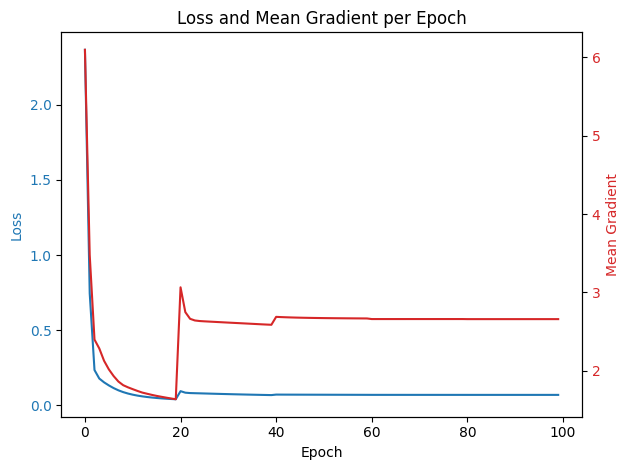

In [15]:
# define a neural network, MLP with 1 hidden layer
def func_nn(x, W1, b1, W2, b2):
    h1 = tanh_d(W1*x + b1)
    y = W2*h1 + b2
    return y

def mse(y, y_hat):
    loss = (y - y_hat)**2
    return loss

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## generate data
    np.random.seed(0)
    x = np.linspace(-2, 2, 100)
    y = 2*x + 1 + np.random.randn(100)*0.1

    ## Parameters
    W1 = Tensor(0.1)
    b1 = Tensor(0.2)
    W2 = Tensor(0.3)
    b2 = Tensor(0.4)
    
    lr = 0.01
    nb_epoch = 100
    loss_history = []
    grad_history = []
    for epoch in range(nb_epoch):
        
        lst_loss = []
        grad_sum = 0.0
        for i in range(len(x)):
            x_i = Tensor(x[i])
            y_i = Tensor(y[i])

            y_hat = func_nn(x_i, W1, b1, W2, b2)
            loss = mse(y_i, y_hat)
            loss.backward()

            lst_loss.append(loss.data)
            grad_sum += abs(W1.grad) + abs(b1.grad) + abs(W2.grad) + abs(b2.grad)

            # Print gradients for debugging (first 3 epochs and first 3 samples)
            if epoch < 3 and i < 3:
                print(f"Epoch {epoch+1}, Sample {i+1}")
                print(f"W1.grad: {W1.grad}, b1.grad: {b1.grad}, W2.grad: {W2.grad}, b2.grad: {b2.grad}")
                print(f"W1.data: {W1.data}, b1.data: {b1.data}, W2.data: {W2.data}, b2.data: {b2.data}")
                print(f"loss: {loss.data}")

            # FIXME: Update with the gradient
            W1.data -= lr * W1.grad
            b1.data -= lr * b1.grad
            W2.data -= lr * W2.grad
            b2.data -= lr * b2.grad

            # FIXME: reset gradients
            W1.grad = 0.0
            b1.grad = 0.0
            W2.grad = 0.0
            b2.grad = 0.0

        mean_loss = np.mean(lst_loss)
        mean_grad = grad_sum / len(x)
        loss_history.append(mean_loss)
        grad_history.append(mean_grad)
        print(f"Epoch {epoch+1}/{nb_epoch}, Loss: {mean_loss}")

        # learning rate decay (fix: only decay every 20 epochs)
        if (epoch + 1) % 20 == 0:
            lr *= 0.1

    # Plot loss and gradient
    fig, ax1 = plt.subplots()
    ax1.plot(loss_history, color='tab:blue', label='Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(grad_history, color='tab:red', label='Gradient')
    ax2.set_ylabel('Mean Gradient', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Loss and Mean Gradient per Epoch')
    fig.tight_layout()
    plt.show()

Epoch 0, Loss: 0.29555262229479456
Epoch 0, Loss: 0.24809441224343637
Epoch 0, Loss: 0.21498594620518652
Epoch 0, Loss: 0.18462254154862906
Epoch 0, Loss: 0.1576032002816279
Epoch 0, Loss: 0.13678641947638712
Epoch 0, Loss: 0.11926853000641309
Epoch 0, Loss: 0.10583446543464084
Epoch 0, Loss: 0.09515428970231507
Epoch 0, Loss: 0.08675308865313071
Epoch 0, Loss: 0.08123648211238105
Epoch 0, Loss: 0.07970489338715149
Epoch 0, Loss: 0.07853868005369094
Epoch 0, Loss: 0.0778151086054493
Epoch 0, Loss: 0.07876195650778292
Epoch 0, Loss: 0.07916462515289288
Epoch 0, Loss: 0.08157848307155832
Epoch 0, Loss: 0.0834299032938369
Epoch 0, Loss: 0.08562956921816714
Epoch 0, Loss: 0.08677161720756464
Epoch 0, Loss: 0.08765650611047596
Epoch 0, Loss: 0.0896711978645963
Epoch 0, Loss: 0.0912971605925269
Epoch 0, Loss: 0.0928784198098744
Epoch 0, Loss: 0.09534543120363007
Epoch 0, Loss: 0.09600897398402536
Epoch 0, Loss: 0.09636373299443893
Epoch 0, Loss: 0.09591345442016772
Epoch 0, Loss: 0.094964252

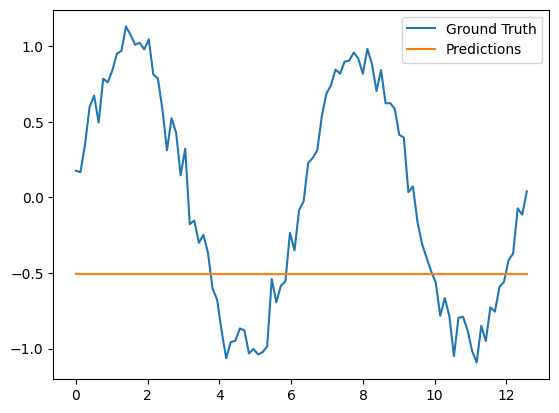

In [16]:
def mse(y, y_hat):
    loss = (y - y_hat)**2
    return loss

def func_rnn(x, h, Wx, Wh, b):
    h_new = tanh_d(Wx*x + Wh*h + b)
    return h_new

def func_nn(h, Wy, by):
    y = Wy*h + by
    return y

if __name__ == "__main__":
    np.random.seed(0)
    
    # Generate time series prediction dataset
    seq_len = 10
    num_samples = 100
    x = np.linspace(0, 4 * np.pi, num_samples)
    y = np.sin(x) + 0.1 * np.random.randn(num_samples)

    # Parameters
    Wx = Tensor(0.01)
    Wh = Tensor(0.01)
    b =  Tensor(0.01)
    Wy = Tensor(0.01)
    by = Tensor(0.01)
    
    lr = 0.01
    nb_epoch = 2
    hidden_size = 1

    for epoch in range(nb_epoch):
        lst_loss = []
        for i in range(num_samples - seq_len):
            h = Tensor(0.0)  # Initial hidden state
            loss_seq = 0
            for t in range(seq_len):
                x_i = Tensor(x[i + t])
                y_i = Tensor(y[i + t])

                h = func_rnn(x_i, h, Wx, Wh, b)
                y_hat = func_nn(h, Wy, by)
                loss = mse(y_i, y_hat)
                loss_seq += loss.data
                loss.backward()

                # FIXME: Update with the gradient the recurrent layer
                Wx.data -= lr * Wx.grad
                Wh.data -= lr * Wh.grad
                b.data  -= lr * b.grad
                Wy.data -= lr * Wy.grad
                by.data -= lr * by.grad
                
                # FIXME: Compute the gradient for output layer weights
                Wy.data -= lr * Wy.grad
                by.data -= lr * by.grad

                # Parameters zeroing
                Wx.grad = 0
                Wh.grad = 0
                b.grad = 0
                Wy.grad = 0
                by.grad = 0

            lst_loss.append(loss_seq / seq_len)
            print(f"Epoch {epoch}, Loss: {np.mean(lst_loss)}")

        # learning rate decay
        lr *= 0.001
# matplotlib is required for plotting
# do a plot for the ground truth and predictions
import matplotlib.pyplot as plt

# Plot ground truth vs predictions
h = Tensor(0.0)
predictions = []
for i in range(num_samples):
    x_i = Tensor(x[i])
    h = func_rnn(x_i, h, Wx, Wh, b)
    y_hat = func_nn(h, Wy, by)
    predictions.append(y_hat.data)
plt.plot(x, y, label='Ground Truth')
plt.plot(x, predictions, label='Predictions')
plt.legend()
plt.show()

In [17]:
class RMSProp(Optimizer):
    def __init__(self, params, learning_rate=0.01, decay=0.9):
        super().__init__(params)
        self.learning_rate = learning_rate
        self.decay = decay
        self.cache = [Tensor(0.0) for _ in params]

    def step(self):
        """
        Mise à jour des paramètres en utilisant la méthode RMSProp.
        La méthode RMSProp (Root Mean Square Propagation) est une méthode d'optimisation adaptative 
        qui divise le taux d'apprentissage par une moyenne exponentielle glissante des carrés des gradients passés.
        """
        for p, c in zip(self.params, self.cache):
            c.data = self.decay * c.data + (1 - self.decay) * p.grad**2
            p.data -= (self.learning_rate * p.grad) / (np.sqrt(c.data) + 1e-8)

NameError: name 'Optimizer' is not defined

In [ ]:
class Adagrad(Optimizer):
    def __init__(self, params, learning_rate=0.01):
        super().__init__(params)
        self.learning_rate = learning_rate
        self.cache = [Tensor(0.0) for _ in params]

    def step(self):
        """
        Mise à jour des paramètres en utilisant la méthode Adagrad.
        La méthode Adagrad (Adaptive Gradient) est une méthode d'optimisation adaptative 
        qui divise le taux d'apprentissage par la racine carrée de la somme cumulée des carrés des gradients passés.
        """
        for p, c in zip(self.params, self.cache):
            c.data += p.grad**2
            p.data -= (self.learning_rate * p.grad) / (np.sqrt(c.data) + 1e-8)

In [ ]:
class AdamW(Optimizer):
    def __init__(self, params, learning_rate=0.001, beta1=0.9, beta2=0.999, eps=1e-8, weight_decay=0.01):
        super().__init__(params)
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.weight_decay = weight_decay
        self.m = [0.0 for _ in params]
        self.v = [0.0 for _ in params]
        self.t = 0

    def step(self):
        """
        Mise à jour des paramètres en utilisant la méthode AdamW.
        La méthode AdamW (Adaptive Moment Estimation with Weight Decay) est une variante de la méthode Adam 
        qui ajoute une régularisation L2 (ou weight decay) aux mises à jour des paramètres.
        """
        self.t += 1

        for i, p in enumerate(self.params):
            # Appliquer le weight decay
            p.data -= self.learning_rate * self.weight_decay * p.data

            # Mettre à jour les moments
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * p.grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * p.grad**2

            # Calcul des moments corrigés
            m_hat = self.m[i] / (1 - self.beta1**self.t)
            v_hat = self.v[i] / (1 - self.beta2**self.t)

            # Mise à jour des paramètres
            p.data -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.eps)

In [ ]:
class Momentum(Optimizer):
    def __init__(self, params, learning_rate=0.01, momentum=0.9):
        super().__init__(params)
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = [Tensor(0.0) for _ in params]

    def step(self):
        for p, v in zip(self.params, self.velocity):
            v.data = self.momentum * v.data - self.learning_rate * p.grad
            p.data += v.data

In [18]:
# define a neural network, MLP with 1 hidden layer
def func_nn(x, W1, b1, W2, b2):
    z = tanh_d(W1 * x + b1)
    y = tanh_d(W2 * z + b2)
    return y

def mse(y, y_hat):
    return (y - y_hat)**2

if __name__ == "__main__":

    ## generate data
    np.random.seed(0)
    x = np.linspace(-2, 2, 100)
    y = 2*x + 1 + np.random.randn(100)*0.1

    ## Parameters
    W1 = Tensor(0.1)
    b1 = Tensor(0.2)
    W2 = Tensor(0.3)
    b2 = Tensor(0.4)

    # create optimizer
    lst_optimizers = [SGD([W1, b1, W2, b2], learning_rate=0.01),
                      Adam([W1, b1, W2, b2], learning_rate=0.01)]

    nb_epoch = 20
    for optimizer in lst_optimizers:
        print(f"\nOptimiseur : {optimizer.__class__.__name__}")
        for _ in range(nb_epoch):

            lst_loss = []
            for i in range(len(x)):
                x_i = Tensor(x[i])
                y_i = Tensor(y[i])

                # forward pass
                y_hat = func_nn(x_i, W1, b1, W2, b2)
                loss = mse(y_i, y_hat)

                # FIXME: zero grad and backward pass
                optimizer.zero_grad()
                loss.backward()

                # FIXME: update parameters
                optimizer.step()

                lst_loss.append(loss.data)

            print(np.mean(lst_loss))

            # learning rate decay
            # optimizer.learning_rate *= 0.1

NameError: name 'SGD' is not defined

In [ ]:
class LRSchedulerOnPlateau(LRScheduler):
    def __init__(self, optimizer, initial_lr, patience=10, factor=0.1, min_lr=1e-6, mode='min', threshold=1e-4):
        super().__init__(optimizer, initial_lr)
        self.patience = patience  # Nombre d'époques sans amélioration avant de réduire le taux
        self.factor = factor  # Facteur de réduction du taux d'apprentissage
        self.min_lr = min_lr  # Valeur minimale du taux d'apprentissage
        self.mode = mode  # 'min' : réduire le taux quand la métrique cesse de diminuer, 'max' : inverse
        self.threshold = threshold  # Seuil pour déterminer la réduction de la métrique
        self.best_metric = float('inf') if mode == 'min' else float('-inf')  # Meilleure métrique observée
        self.num_bad_epochs = 0  # Nombre d'époques sans amélioration de la métrique

    def update_lr(self, metric):
        if self.mode == 'min':
            if metric < self.best_metric - self.threshold:
                self.best_metric = metric
                self.num_bad_epochs = 0
            else:
                self.num_bad_epochs += 1
        else:
            if metric > self.best_metric + self.threshold:
                self.best_metric = metric
                self.num_bad_epochs = 0
            else:
                self.num_bad_epochs += 1
        
        if self.num_bad_epochs >= self.patience:
            old_lr = self.lr
            self.lr = max(self.lr * self.factor, self.min_lr)
            self.num_bad_epochs = 0
            self.optimizer.learning_rate = self.lr
     

In [ ]:
import numpy as np

# Définition du réseau de neurones MLP avec une couche cachée
def func_nn(x, W1, b1, W2, b2):
    h1 = W1 * x + b1
    y = W2 * h1 + b2
    return y

# Fonction de perte MSE
def mse(y, y_hat):
    return (y - y_hat) ** 2

if __name__ == "__main__":

    # Génération de données synthétiques
    np.random.seed(0)
    x = np.linspace(-10, 10, 10000)
    y = np.sin(x * 2) + np.cos(x * 3) + 1 + np.random.randn(10000) * 0.1

    # Initialisation des paramètres du modèle
    W1 = Tensor(0.1)
    b1 = Tensor(0.2)
    W2 = Tensor(0.3)
    b2 = Tensor(0.4)

    # Choix des optimiseurs
    lst_optimizers = [SGD([W1, b1, W2, b2], learning_rate=0.01),
                      Adam([W1, b1, W2, b2], learning_rate=0.01)]

    nb_epoch = 30
    for optimizer in lst_optimizers:
        print(f"\nOptimiseur : {optimizer.__class__.__name__}")

        # Initialisation du scheduler de taux d'apprentissage
        scheduler = LRSchedulerOnPlateau(optimizer=optimizer, 
                                        patience=3,
                                        initial_lr=0.01)

        # Training loop
        for epoch in range(nb_epoch):
            lst_loss = []
            for i in range(len(x)):
                x_i = Tensor(x[i])
                y_i = Tensor(y[i])

                # Forward pass
                y_hat = func_nn(x_i, W1, b1, W2, b2)
                loss = mse(y_i, y_hat)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()

                # Mise à jour des paramètres
                optimizer.step()

                lst_loss.append(loss.data)

            # Affichage de la perte moyenne par époque
            print(f"Époque {epoch + 1}, perte moyenne = {np.mean(lst_loss)}")

            # FIXME: Appel du scheduler pour ajuster le taux d'apprentissage
            scheduler.step(np.mean(lst_loss))
            print(f"Taux d'apprentissage ajusté : {optimizer.learning_rate}"    )

In [ ]:
class LRSchedulerOnPlateau(LRScheduler):
    def __init__(self, optimizer, initial_lr, patience=10, factor=0.1, min_lr=1e-6, mode='min', threshold=1e-4):
        super().__init__(optimizer, initial_lr)
        self.patience = patience  # Nombre d'époques sans amélioration avant de réduire le taux
        self.factor = factor  # Facteur de réduction du taux d'apprentissage
        self.min_lr = min_lr  # Valeur minimale du taux d'apprentissage
        self.mode = mode  # 'min' : réduire le taux quand la métrique cesse de diminuer, 'max' : inverse
        self.threshold = threshold  # Seuil pour déterminer la réduction de la métrique
        self.best_metric = float('inf') if mode == 'min' else float('-inf')  # Meilleure métrique observée
        self.num_bad_epochs = 0  # Nombre d'époques sans amélioration de la métrique

    def update_lr(self, metric):
        if self.mode == 'min':
            if metric < self.best_metric - self.threshold:
                self.best_metric = metric
                self.num_bad_epochs = 0
            else:
                self.num_bad_epochs += 1
        else:
            if metric > self.best_metric + self.threshold:
                self.best_metric = metric
                self.num_bad_epochs = 0
            else:
                self.num_bad_epochs += 1
        
        if self.num_bad_epochs >= self.patience:
            print("Reducing learning rate.")
            self.lr = max(self.lr * self.factor, self.min_lr)
            self.num_bad_epochs = 0
            self.optimizer.learning_rate = self.lr

In [ ]:
class LRScheduler:
    def __init__(self, optimizer, initial_lr):
        self.optimizer = optimizer
        self.initial_lr = initial_lr
        self.lr = initial_lr
        self.iteration = 0  # Ou self.epoch = 0 si basé sur les époques
    
    def update_lr(self, metrics=None):
        # Exemple de décroissance du taux d'apprentissage basée sur le nombre d'itérations
        self.iteration += 1
        self.lr = self.initial_lr / (1 + 0.01 * self.iteration)  # Décroissance simple

    def step(self, metrics=None):
        self.update_lr(metrics)
        self.optimizer.learning_rate = self.lr